<a href="https://colab.research.google.com/github/NEBTICS/Cats_Dogs_CNN_model/blob/master/cats_and_dog__CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
code to prevent colab from disconecting !!!


function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}
setInterval(ConnectButton,60000);


Set a javascript interval to click on the connect button every 60 seconds.
Open developer-settings (in your web-browser) with Ctrl+Shift+I then click on console tab and type this on 
the console prompt. (for mac press Option+Command+I)
"""

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smithbarbose","key":"efd499fa06f6c2554fefc5408c46cac1"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

In [4]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d tongpython/cat-and-dog

 96% 209M/218M [00:02<00:00, 124MB/s]
100% 218M/218M [00:02<00:00, 100MB/s]


In [ ]:
!unzip  cat-and-dog.zip

Importing library

In [7]:
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [8]:
#Importing the data set 
#First we need to create the Image Augmantation
traning_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip='True')
test_datagen=ImageDataGenerator(rescale=1./255)

In [37]:
#creating the test & train sets
traning_set=traning_datagen.flow_from_directory('/content/training_set/training_set',batch_size=60,target_size=(64,64),class_mode='binary')
test_set=test_datagen.flow_from_directory('/content/test_set/test_set',batch_size=60,target_size=(64,64),class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [79]:
model=tf.keras.Sequential()
#first layer
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=[64,64,3],activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
#second
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
#flatten
model.add(tf.keras.layers.Flatten())
#adding the nural net
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=124,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 10816)           

In [80]:

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x=traning_set,validation_data=test_set,epochs=10)


Epoch 1/10
134/134 [==============================] - 33s 246ms/step - loss: 0.6678 - accuracy: 0.5815 - val_loss: 0.6127 - val_accuracy: 0.6639
Epoch 2/10
134/134 [==============================] - 33s 245ms/step - loss: 0.6095 - accuracy: 0.6658 - val_loss: 0.5688 - val_accuracy: 0.7088
Epoch 3/10
134/134 [==============================] - 33s 244ms/step - loss: 0.5762 - accuracy: 0.6912 - val_loss: 0.5475 - val_accuracy: 0.7232
Epoch 4/10
134/134 [==============================] - 33s 246ms/step - loss: 0.5441 - accuracy: 0.7220 - val_loss: 0.5138 - val_accuracy: 0.7464
Epoch 5/10
134/134 [==============================] - 33s 243ms/step - loss: 0.5200 - accuracy: 0.7349 - val_loss: 0.4807 - val_accuracy: 0.7647
Epoch 6/10
134/134 [==============================] - 33s 245ms/step - loss: 0.4871 - accuracy: 0.7683 - val_loss: 0.4860 - val_accuracy: 0.7776
Epoch 7/10
134/134 [==============================] - 33s 244ms/step - loss: 0.4823 - accuracy: 0.7664 - val_loss: 0.4758 - val_ac

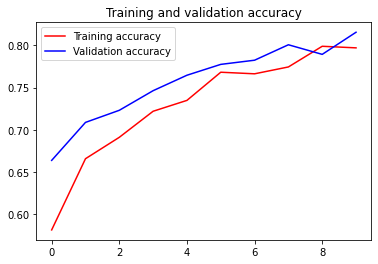

<Figure size 432x288 with 0 Axes>

In [81]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [83]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
traning_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

cat


In [ ]:
model.save('/content/drive/My Drive/Machine Learning/Cats_dog.h5')